# Vortices in Potential Flow


In this notebook we will produce sample data using potential flow as a numerical laboratory to experiment and prototype different vorticy identifying techniques. This script is heavily based on https://github.com/richardagalvez/Vortices-Python/blob/master/Vortex-FTLE.ipynb
    

Define some libs

In [67]:
import numpy as np
# import math
# from matplotlib import pyplot
import matplotlib.pyplot as plt
import time
import sys

# %matplotlib inline
%config InlineBackend.figure_format = 'retina'

and also define a function to return the velocity of a vortex

In [125]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """Returns the velocity field generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
#     u = + strength/(2*np.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
#     v = - strength/(2*np.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    u = + strength/(2*np.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*np.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)

    
    return u, v

## Let's draw the vortex first

Let's start by defining the mesh (we'll also keep the same mesh for the various examples):

In [126]:
N = 120
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0

x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)

X, Y = numpy.meshgrid(x, y)

Next we'll introduce the flow producing elements. First we define a freestream with the strength set to 1.0 and the angle of attack set to 0.
Then define the strength and location of the vortex.

In [127]:
u_inf = 1.0                     # Farfield speed
alpha = 0.0*np.pi/180           # Angle of attack degrees --> radians
gamma = 5.0                     # strength of the vortex
x_vortex, y_vortex = (0.0, 0.0) # location of vortex1

Now that we have a vortex, it's strength and a freestream field, we can calculate the flow within our mesh.

In [139]:
u, v = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)
# u += u_inf * X * np.cos(alpha)
# v += u_inf * Y * np.sin(alpha)

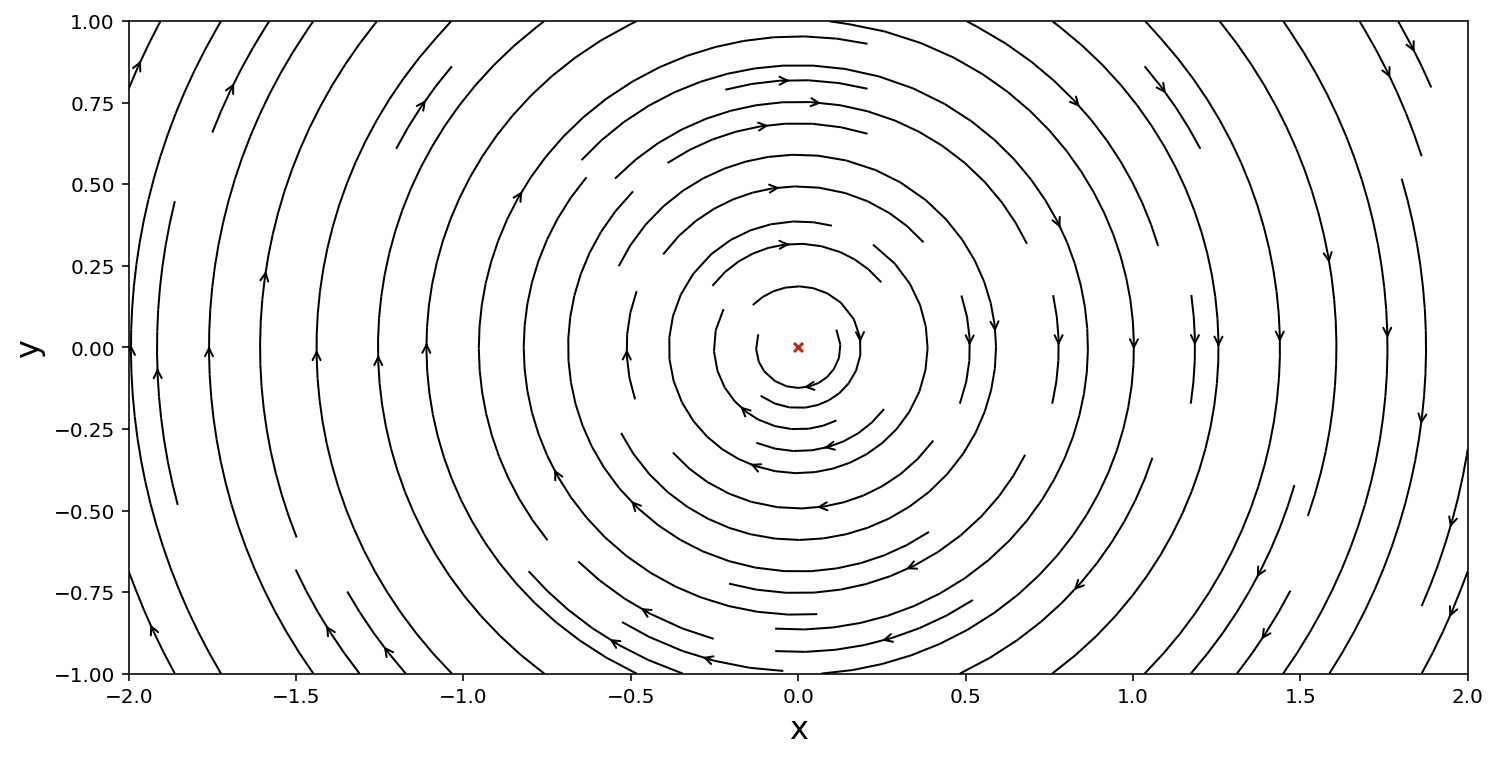

In [140]:
size = 12 # Size of the image displayed only in this notebook.

# Where to save the pdf image file. Note you can use png, eps, etc for different
# formats

fig = pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)                                                           

# plt.contourf(X, Y, np.sqrt(u**2+v**2), cmap='Blues')
plt.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->', color='k')
plt.scatter(x_vortex, y_vortex, color='#CD2305', s=20, marker='x')
plt.draw()
    
# fig.savefig(fileName)